In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [6]:
out_dir = '../test'
pairs_files = [
    f'{out_dir}/nex10_pairs.npz',
    f'{out_dir}/sat20_pairs.npz',
    f'{out_dir}/nex20_pairs.npz',
    f'{out_dir}/nex_nex_pairs.npz',
]

date_begin = datetime(2007, 1, 3)
date_end = datetime(2007, 1, 7)


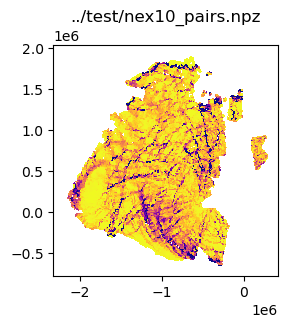

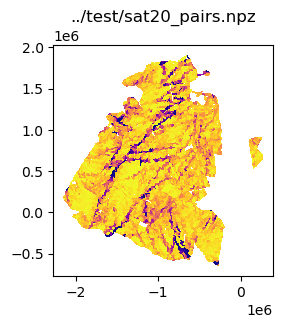

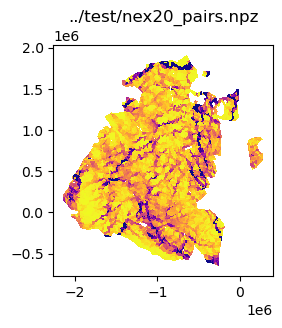

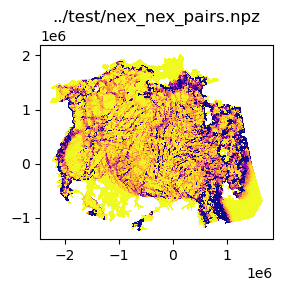

In [8]:
for pfile in pairs_files:
    dfile = pfile.replace('_pairs.npz', '_defor.npz')
    with np.load(pfile, allow_pickle=True) as f:
        pairs = f['pairs']
    
    with np.load(dfile, allow_pickle=True) as f:
        defor = f['defor']
    
    fig, axs = plt.subplots(1, 1, figsize=(3, 3))
    for p, d in zip(pairs, defor):
        if p is None or d is None:
            continue
        if date_begin <= p.d0 <= date_end:
            axs.tripcolor(p.x0, p.y0, p.t, d.e2 * 24 * 60 * 60, mask=~p.g, cmap='plasma_r', vmin=0, vmax=0.1)

    axs.set_aspect('equal')
    axs.set_title(pfile)
    plt.show()
